# ResNet18
* one day for testing, the rest for training
* batch size: 32
* num_epochs: 10
* Each experiment is run 20 times. 

| # training data | 10  | 20    | 50    | 100   | 150   | 200   | All (846) |
| ---           | ---   | ---   | ---   | ---   | ---   | ---   | ---   |
| acc           | 0.542 | 0.571 | 0.761 | 0.860 | 0.906 | 0.926 | 0.972 |


# ResNet18-masked

| # training data | 10  | 20    | 50    | 100   | 150   | 200   | All (846) |
| ---           | ---   | ---   | ---   | ---   | ---   | ---   | ---   |
| acc           | 0.522 | 0.513 | 0.685 | 0.864 | 0.904 | 0.926 | 0.962 |


# ResNet18-pad

| # training data | 10  | 20    | 50    | 100   | 150   | 200   | All (846) |
| ---           | ---   | ---   | ---   | ---   | ---   | ---   | ---   |
| acc           | 0.628 | 0.627 | 0.822 | 0.867 | 0.885 | 0.912 | 0.968 |


# VOCAL
* one day for testing, the rest for training
* Each experiment is run 20 times. 

| # training data | 10  | 20    | 50    | 100   | 150   | 200   | All (846) |
| ---           | ---   | ---   | ---   | ---   | ---   | ---   | ---   |
| acc           | 0.811 |  0.848| 0.908 | 0.929 | 0.948 | 0.956 | 0.967 |


In [5]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

Text(0, 0.5, 'accuracy')

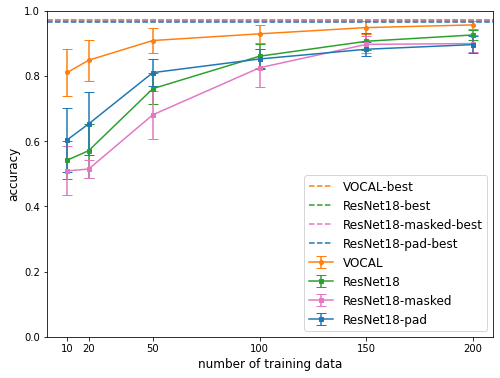

In [6]:
with open("/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/src/outputs/predicates/predicate_objects_person_sitting_and_standing_vocal.json", 'r') as f:
    vocal_res = json.loads(f.read())

with open("/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/src/outputs/predicates/predicate_objects_person_sitting_and_standing_deep.json", 'r') as f:
    deep_res = json.loads(f.read())

with open("/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/src/outputs/predicates/predicate_objects_person_sitting_and_standing_deep_masked.json", 'r') as f:
    deep_masked_res = json.loads(f.read())

with open("/mmfs1/gscratch/balazinska/enhaoz/complex_event_video/src/outputs/predicates/predicate_objects_person_sitting_and_standing_deep_pad.json", 'r') as f:
    deep_pad_res = json.loads(f.read())

x = [10, 20, 50, 100, 150, 200]
vocal_y = []
vocal_yerr = []
for row in vocal_res:
    if row[0] == None:
        vocal_best, vocal_best_yerr = row[1:3]
        continue
    vocal_y.append(row[1])
    vocal_yerr.append(row[2])
deep_y = []
deep_yerr = []
for row in deep_res:
    if row[0] == None:
        deep_best, deep_best_yerr = row[1:3]
        continue
    deep_y.append(row[1])
    deep_yerr.append(row[2])
deep_masked_y = []
deep_masked_yerr = []
for row in deep_masked_res:
    if row[0] == None:
        deep_masked_best, deep_masked_best_yerr = row[1:3]
        continue
    deep_masked_y.append(row[1])
    deep_masked_yerr.append(row[2])
deep_pad_y = []
deep_pad_yerr = []
for row in deep_pad_res:
    if row[0] == None:
        deep_pad_best, deep_pad_best_yerr = row[1:3]
        continue
    deep_pad_y.append(row[1])
    deep_pad_yerr.append(row[2])

# plot it!
fig, ax = plt.subplots(1, figsize=(8, 6))

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(10)

ax.errorbar(x, vocal_y, yerr=vocal_yerr, label='VOCAL', marker='o', markersize=4, markevery=1, color='tab:orange', capsize=5)
ax.axhline(y=vocal_best, color='tab:orange', label="VOCAL-best", linestyle='--')
ax.errorbar(x, deep_y, yerr=deep_yerr, label='ResNet18', marker='s', markersize=4, markevery=1, color='tab:green', capsize=5)
ax.axhline(y=deep_best, color='tab:green', label="ResNet18-best", linestyle='--')
ax.errorbar(x, deep_masked_y, yerr=deep_masked_yerr, label='ResNet18-masked', marker='s', markersize=4, markevery=1, color='tab:pink', capsize=5)
ax.axhline(y=deep_best, color='tab:pink', label="ResNet18-masked-best", linestyle='--')
ax.errorbar(x, deep_pad_y, yerr=deep_pad_yerr, label='ResNet18-pad', marker='s', markersize=4, markevery=1, color='tab:blue', capsize=5)
ax.axhline(y=deep_pad_best, color='tab:blue', label="ResNet18-pad-best", linestyle='--')
ax.legend(loc='lower right', prop={"size":12})

ax.set_ylim(0, 1)
ax.set_xticks(x)
ax.set_xlabel('number of training data', fontsize=12)
ax.set_ylabel('accuracy', fontsize=12)
# plt.savefig(outfile, bbox_inches='tight', pad_inches=0)